# **Digit determine with Keras and TensorFlow**

In [1]:
import pandas as pd
from skimage import io

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


# ** Data preparation**

In [2]:
data_train = pd.read_csv('train.csv')
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,:1]

In [3]:
X_train /= 255
X_train = X_train.as_matrix()
y_train = np_utils.to_categorical(y_train, 10)

# **Building model**

In [4]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
optimizer=SGD(),
metrics=['accuracy']) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
__________

In [5]:
model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=2, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
3s - loss: 2.0008 - acc: 0.4723 - val_loss: 1.4285 - val_acc: 0.7363
Epoch 2/20
3s - loss: 0.9058 - acc: 0.8051 - val_loss: 0.6009 - val_acc: 0.8535
Epoch 3/20
3s - loss: 0.5116 - acc: 0.8651 - val_loss: 0.4357 - val_acc: 0.8837
Epoch 4/20
3s - loss: 0.4097 - acc: 0.8858 - val_loss: 0.3773 - val_acc: 0.8954
Epoch 5/20
3s - loss: 0.3634 - acc: 0.8985 - val_loss: 0.3406 - val_acc: 0.9070
Epoch 6/20
3s - loss: 0.3340 - acc: 0.9038 - val_loss: 0.3152 - val_acc: 0.9089
Epoch 7/20
3s - loss: 0.3135 - acc: 0.9098 - val_loss: 0.3034 - val_acc: 0.9132
Epoch 8/20
3s - loss: 0.2968 - acc: 0.9137 - val_loss: 0.2855 - val_acc: 0.9173
Epoch 9/20
3s - loss: 0.2830 - acc: 0.9183 - val_loss: 0.2777 - val_acc: 0.9211
Epoch 10/20
3s - loss: 0.2704 - acc: 0.9209 - val_loss: 0.2652 - val_acc: 0.9231
Epoch 11/20
3s - loss: 0.2597 - acc: 0.9235 - val_loss: 0.2542 - val_acc: 0.9267
Epoch 12/20
3s - loss: 0.2494 - acc: 0.9267 - val_loss: 0.2456 - val_

# **Check prediction**

In [6]:
def check_prediction(img_path):
        img = io.imread(img_path, as_grey=True)
        img = img.reshape(28,28)
        print("Your handwritten digit")
        io.imshow(img)
        io.show()
        img = img.reshape(1, 784)
        prediction = model.predict_classes(img)
        print(f"The model recognized the digit ---> {prediction} <---")

Your handwritten digit


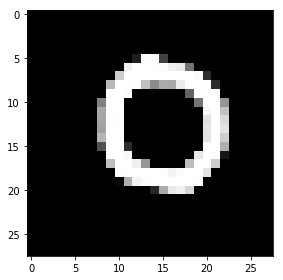

1/1 [==============================] - 0s
The model recognized the digit ---> [9] <---


In [18]:
check_prediction("ExamDigits/0.png")